# Sentiment Analysis
Sentiment analysis (or opinion mining) uses NLP to determine whether data is positive, negative or neutral. Sentiment analysis is often performed on textual data to help businesses monitor brand and product sentiment in customer feedback, and understand customer needs.

In [1]:
import pandas as pd
import numpy as np 

from gensim.parsing.preprocessing import remove_stopwords
from sklearn.model_selection import train_test_split


## Reading Data

In [2]:
data = pd.read_csv('C:\\Users\\nehal\\Music\\12.NLP\\Practise\\Datasets\\IMDB Dataset.csv').sample(1000,random_state=10).reset_index().drop(['index'],axis=1)
print(data.shape)
data.head()

(1000, 2)


,review,sentiment
0,"This is one of the very, very few films that a...",positive
1,"Fred ""The Hammer"" Williamson delivers another ...",negative
2,"When the trailer for Accepted first came up, m...",positive
3,Buddy is an entertaining family film set in a ...,positive
4,I thought the kids in the movie were great. I ...,positive


In [5]:
docs=data['review'].str.lower().str.replace('[^a-z\s]','')
docs[:5]

0    this is one of the very very few films that ar...
1    fred the hammer williamson delivers another ch...
2    when the trailer for accepted first came up ma...
3    buddy is an entertaining family film set in a ...
4    i thought the kids in the movie were great i d...
Name: review, dtype: object

## Feature Extraction

In [13]:
train_docs,test_docs=train_test_split(docs)
print(train_docs.shape,test_docs.shape)

(750,) (250,)


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
vectorizer=TfidfVectorizer(min_df=5)
vectorizer.fit(train_docs)

train_dtm=vectorizer.transform(train_docs)
test_dtm=vectorizer.transform(test_docs)

In [17]:
train_y=data.loc[train_docs.index,'sentiment']
test_y=data.loc[test_docs.index,'sentiment']

### Method 1: Model Based

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [21]:
model=MultinomialNB().fit(train_dtm,train_y)
y_pred=model.predict(test_dtm)

<AxesSubplot:>

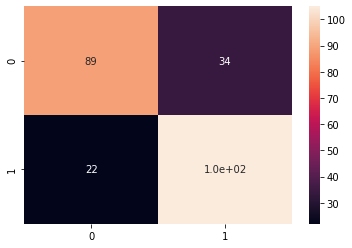

In [25]:
sns.heatmap(confusion_matrix(test_y,y_pred),annot=True)

### Model 2: Sentiment analysis based on Rule Based Algorithm

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [28]:
analyzer=SentimentIntensityAnalyzer()
analyzer.polarity_scores('I hate coffee!!')

{'neg': 0.811, 'neu': 0.189, 'pos': 0.0, 'compound': -0.6467}

In [32]:
data.head()

,review,sentiment
0,"This is one of the very, very few films that a...",positive
1,"Fred ""The Hammer"" Williamson delivers another ...",negative
2,"When the trailer for Accepted first came up, m...",positive
3,Buddy is an entertaining family film set in a ...,positive
4,I thought the kids in the movie were great. I ...,positive


In [36]:
data['vader']=data['review'].apply(lambda v: analyzer.polarity_scores(v)['compound'])
data.head()

,review,sentiment,vader
0,"This is one of the very, very few films that a...",positive,0.9649
1,"Fred ""The Hammer"" Williamson delivers another ...",negative,-0.2481
2,"When the trailer for Accepted first came up, m...",positive,0.9934
3,Buddy is an entertaining family film set in a ...,positive,0.9032
4,I thought the kids in the movie were great. I ...,positive,0.8366


In [37]:
def vader_to_sentiment(score):
    if score>0:
        return 'positive'
    else:
        return 'negative'
    

In [39]:
data['vader_score']=data['vader'].apply(vader_to_sentiment)
data.head()

,review,sentiment,vader,vader_score
0,"This is one of the very, very few films that a...",positive,0.9649,positive
1,"Fred ""The Hammer"" Williamson delivers another ...",negative,-0.2481,negative
2,"When the trailer for Accepted first came up, m...",positive,0.9934,positive
3,Buddy is an entertaining family film set in a ...,positive,0.9032,positive
4,I thought the kids in the movie were great. I ...,positive,0.8366,positive


<AxesSubplot:>

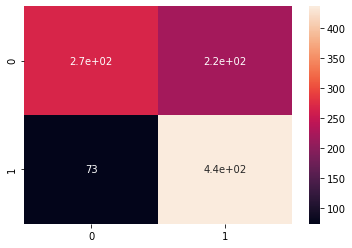

In [41]:
sns.heatmap(confusion_matrix(data['sentiment'],data['vader_score']),annot=True)

### Limitations of Document Term Matrix
- Sparsity
    - close to 95% of the values will be zero
- High dimension
    - Document vectors: Dimension is based on vocabulary size
    - Word vectors: Dimension is based on no. of documents
    - In thousands
- Vector representation of words/terms is very local (specific to the dataset)
    - Alternative: Have a global vector representation for commonly used words in literature???
- Relationship between the terms are not preserved/captured
    - Cannot determine if two words appears next to each (context) or away from each other